In [35]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract


# Tifinagh Image Processing

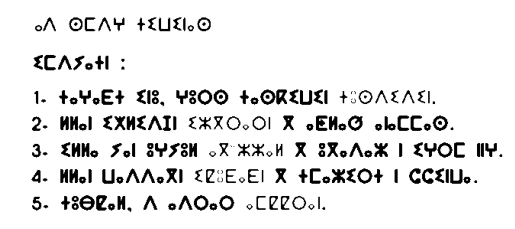

In [36]:
# function to improve skew correction and preserve the full image
def preprocess_image_corrected(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to remove noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Otsu's thresholding for binarization
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Skew correction using Hough Transform
    coords = np.column_stack(np.where(binary_image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    
    (h, w) = binary_image.shape[:2]
    center = (w // 2, h // 2)

    # Calculate the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    abs_cos = abs(M[0, 0])
    abs_sin = abs(M[0, 1])

    # Find the new bounding dimensions of the image
    new_w = int(h * abs_sin + w * abs_cos)
    new_h = int(h * abs_cos + w * abs_sin)

    # Adjust the rotation matrix to take into account translation
    M[0, 2] += new_w / 2 - center[0]
    M[1, 2] += new_h / 2 - center[1]

    # Perform the actual rotation and preserve the full image
    corrected_image = cv2.warpAffine(binary_image, M, (new_w, new_h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # Manually rotate the image by 90 degrees counterclockwise to correct orientation
    corrected_orientation_image = cv2.rotate(corrected_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

    # Return the corrected image
    return corrected_orientation_image

# Specifying the image path you provided
image_path = "C:/Users/bouad/OneDrive/Bureau/Amazigh NLP/MNIST-BERBER/Tifinagh-version/TifinaghSCRIPT.png"

# Applying the corrected preprocessing to the image
preprocessed_image_corrected = preprocess_image_corrected(image_path)

# Display the correctly oriented image in the notebook
plt.imshow(preprocessed_image_corrected, cmap='gray')
plt.axis('off')
plt.show()


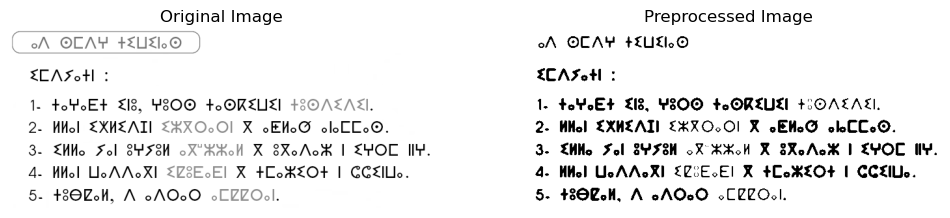

In [37]:
# Displaying the original and preprocessed images side by side
def display_images(original_image_path, preprocessed_image):
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    
    plt.figure(figsize=(12, 6))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Display preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')
    
    plt.show()

# Display the images for visual inspection
display_images(image_path, preprocessed_image_corrected)


## Skew Correction Validation

In [38]:
def calculate_skew_angle(image):
    # Apply Gaussian blur to remove noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Otsu's thresholding for binarization
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find coordinates of all non-zero pixels
    coords = np.column_stack(np.where(binary_image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    # Correct the angle
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    
    return angle

# Calculating skew angles
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original_skew_angle = calculate_skew_angle(original_image)
corrected_skew_angle = calculate_skew_angle(preprocessed_image_corrected)

print(f"Original Skew Angle: {original_skew_angle:.2f} degrees")
print(f"Corrected Skew Angle: {corrected_skew_angle:.2f} degrees")


Original Skew Angle: -90.00 degrees
Corrected Skew Angle: -90.00 degrees


## Binary Image Quality Check

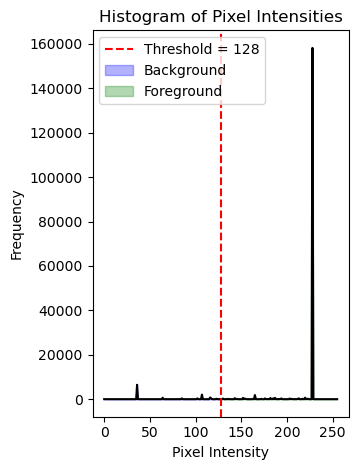

In [39]:
def check_binarization_quality(image, threshold=128):
    # Calculate the histogram of the pixel intensities
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    

    # Plot the histogram with threshold
    plt.subplot(1, 2, 2)
    plt.plot(hist, color='black')
    plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
    plt.fill_between(bins[:-1], hist, where=(bins[:-1] < threshold), color='blue', alpha=0.3, label='Background')
    plt.fill_between(bins[:-1], hist, where=(bins[:-1] >= threshold), color='green', alpha=0.3, label='Foreground')
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

image_path = "C:/Users/bouad/OneDrive/Bureau/Amazigh NLP/MNIST-BERBER/Tifinagh-version/TifinaghSCRIPT.png"  
image = Image.open(image_path).convert('L')
preprocessed_image_corrected = np.array(image)

# Check binary image quality
check_binarization_quality(preprocessed_image_corrected, threshold=128)


In [40]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  
def perform_ocr(image):
    # Convert the image to PIL format for Tesseract
    pil_image = Image.fromarray(image)
    
    # Perform OCR using Tesseract
    extracted_text = pytesseract.image_to_string(pil_image, lang='eng')  
    return extracted_text

# Perform OCR on the preprocessed image
ocr_text = perform_ocr(preprocessed_image_corrected)
print("Extracted Text from Preprocessed Image:")
print(ocr_text)


Extracted Text from Preprocessed Image:
\

CoA OLAY +£LE10O_ )

SLAFotl :

1- tottoEt+ 218, 1300 +o.OKSUZI t8OAZAZI.

2- WHol SXHZAII ZKXOO! KX cEWoS oloL LO.

3- SMHo Fol SSH oX RAH KX 8XoAck | SOL it.
4- WHol LoAAoXl 2Z8EoEl X +LokOt | CCZILo.
5- t8@Zol, A oAOcO oLLZZOol.



# Latin-Amazigh Image Processing

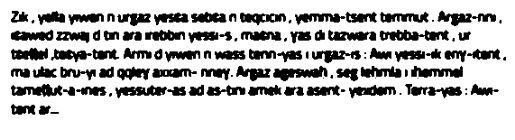

In [41]:
# function to improve skew correction and preserve the full image
def preprocess_image_corrected(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to remove noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Otsu's thresholding for binarization
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Skew correction using Hough Transform
    coords = np.column_stack(np.where(binary_image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    
    (h, w) = binary_image.shape[:2]
    center = (w // 2, h // 2)

    # Calculate the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    abs_cos = abs(M[0, 0])
    abs_sin = abs(M[0, 1])

    # Find the new bounding dimensions of the image
    new_w = int(h * abs_sin + w * abs_cos)
    new_h = int(h * abs_cos + w * abs_sin)

    # Adjust the rotation matrix to take into account translation
    M[0, 2] += new_w / 2 - center[0]
    M[1, 2] += new_h / 2 - center[1]

    # Perform the actual rotation and preserve the full image
    corrected_image = cv2.warpAffine(binary_image, M, (new_w, new_h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # Manually rotate the image by 90 degrees counterclockwise to correct orientation
    corrected_orientation_image = cv2.rotate(corrected_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

    # Return the corrected image
    return corrected_orientation_image

# Specify the image path you provided
image_path = r"C:\Users\bouad\OneDrive\Bureau\Amazigh NLP\MNIST-BERBER\Latin-version\Latin-Amazigh.png"

# Apply the corrected preprocessing to the image
preprocessed_image_corrected = preprocess_image_corrected(image_path)

# Display the correctly oriented image in the notebook
plt.imshow(preprocessed_image_corrected, cmap='gray')
plt.axis('off')
plt.show()


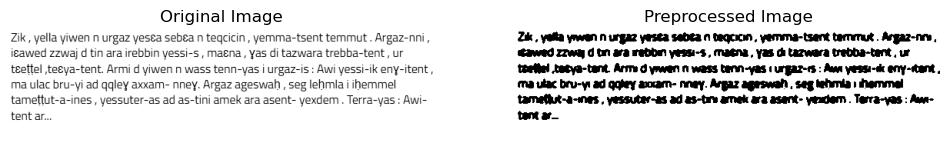

In [42]:
# Display the original and preprocessed images side by side
def display_images(original_image_path, preprocessed_image):
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    
    plt.figure(figsize=(12, 6))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Display preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')
    
    plt.show()

# Display the images for visual inspection
display_images(image_path, preprocessed_image_corrected)


## Skew Correction Validation

In [49]:
def calculate_skew_angle(image):
    # Apply Gaussian blur to remove noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Otsu's thresholding for binarization
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find coordinates of all non-zero pixels
    coords = np.column_stack(np.where(binary_image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    # Correct the angle
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    
    return angle

image_path = r"C:\Users\bouad\OneDrive\Bureau\Amazigh NLP\MNIST-BERBER\Latin-version\Latin-Amazigh.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
preprocessed_image_corrected = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 

# Calculate skew angles
original_skew_angle = calculate_skew_angle(original_image)
corrected_skew_angle = calculate_skew_angle(preprocessed_image_corrected)

# Print skew angles
print(f"Original Skew Angle: {original_skew_angle:.2f} degrees")
print(f"Corrected Skew Angle: {corrected_skew_angle:.2f} degrees")


Original Skew Angle: -90.00 degrees
Corrected Skew Angle: -90.00 degrees


## Binary Image Quality Check

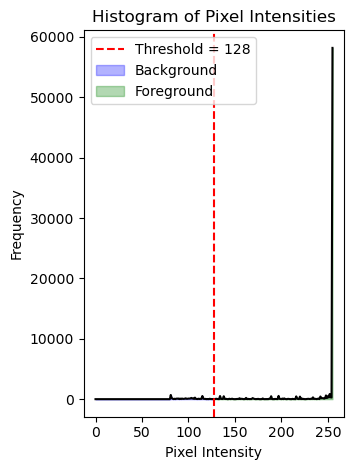

In [47]:
def check_binarization_quality(image, threshold=128):
    # Calculate the histogram of the pixel intensities
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    

    # Plot the histogram with threshold
    plt.subplot(1, 2, 2)
    plt.plot(hist, color='black')
    plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
    plt.fill_between(bins[:-1], hist, where=(bins[:-1] < threshold), color='blue', alpha=0.3, label='Background')
    plt.fill_between(bins[:-1], hist, where=(bins[:-1] >= threshold), color='green', alpha=0.3, label='Foreground')
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

image_path = r"C:\Users\bouad\OneDrive\Bureau\Amazigh NLP\MNIST-BERBER\Latin-version\Latin-Amazigh.png"  
image = Image.open(image_path).convert('L')
preprocessed_image_corrected = np.array(image)

# Check binary image quality
check_binarization_quality(preprocessed_image_corrected, threshold=128)


In [48]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  

def perform_ocr(image):
    # Convert the image to PIL format for Tesseract
    pil_image = Image.fromarray(image)
    
    # Perform OCR using Tesseract
    extracted_text = pytesseract.image_to_string(pil_image, lang='eng')  
    return extracted_text

# Perform OCR on the preprocessed image
ocr_text = perform_ocr(preprocessed_image_corrected)
print("Extracted Text from Preprocessed Image:")
print(ocr_text)


Extracted Text from Preprocessed Image:
Zik , yella yiwen n urgaz yesea sebea n teqcicin , yemma-tsent temmut . Argaz-nni,
ieawed zzwaj d tin ara irebbin yessi-s , magna , yas di tazwara trebba-tent , ur
teettel teeya-tent. Armi d yiwen n wass tenn-yas i urgaz-is : Awi yessi-ik eny-itent
ma ulac bru-yi ad qgley axxam- nney. Argaz ageswah , seg lehmla i ihemmel
tamettut-a-ines , yessuter-as ad as-tini amek ara asent- yexdem . Terra-yas : Awi-
tent ar..

